# Machine Learning With Scikit-Learn

In [2]:
# Import libraries 
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

%matplotlib inline 


## Load the breast cancer data and display the essential information 

In [3]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(cancer.feature_names)
print()
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [5]:
print(type(cancer.data))

print(cancer.data)

print(cancer.data.shape)

<class 'numpy.ndarray'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


## Process Outline 
### 1. Get the data (pre-process it)
### 2. Pick an algorithm for the classifier 
### 3. Train the data: verify its accurary, and then optimize
### 4. Make prediction 


In [6]:
import pandas as pd 

# Read the "breast-cancer-wisconsin-data.csv" data file, and then display the last 10 records 
raw_data = pd.read_csv("./data_sets/breast-cancer-wisconsin-data.csv", delim_whitespace=',')

raw_data.tail(10)


,"id,""diagnosis"",""radius_mean"",""texture_mean"",""perimeter_mean"",""area_mean"",""smoothness_mean"",""compactness_mean"",""concavity_mean"",""concave","points_mean"",""symmetry_mean"",""fractal_dimension_mean"",""radius_se"",""texture_se"",""perimeter_se"",""area_se"",""smoothness_se"",""compactness_se"",""concavity_se"",""concave","points_se"",""symmetry_se"",""fractal_dimension_se"",""radius_worst"",""texture_worst"",""perimeter_worst"",""area_worst"",""smoothness_worst"",""compactness_worst"",""concavity_worst"",""concave","points_worst"",""symmetry_worst"",""fractal_dimension_worst"","
559,"925291,B,11.51,23.93,74.52,403.5,0.09261,0.102...",NaN,NaN,NaN
560,"925292,B,14.05,27.15,91.38,600.4,0.09929,0.112...",NaN,NaN,NaN
561,"925311,B,11.2,29.37,70.67,386,0.07449,0.03558,...",NaN,NaN,NaN
562,"925622,M,15.22,30.62,103.4,716.9,0.1048,0.2087...",NaN,NaN,NaN
563,"926125,M,20.92,25.09,143,1347,0.1099,0.2236,0....",NaN,NaN,NaN
564,"926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2...",NaN,NaN,NaN
565,"926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,...",NaN,NaN,NaN
566,"926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023...",NaN,NaN,NaN
567,"927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0....",NaN,NaN,NaN
568,"92751,B,7.76,24.54,47.92,181,0.05263,0.04362,0...",NaN,NaN,NaN


## K-Nearest Neighbors (KNN) Algorithm Description: 
####     KNN a supervised Machine Learning algorithm y = f(x) where y is the output and x is the input. KNN is used in the statistical estimation and pattern recognition. It is a simple algorithm that  stores all available cases, classifies and perform regression new cases based on similarity measure (distance). 


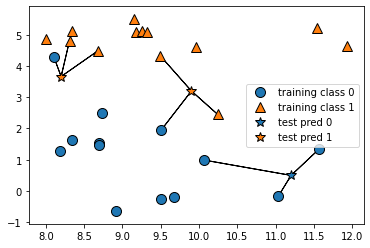

In [7]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy of KNN n-5, on the training set: {:.3f}".format(knn.score(X_train, y_train)))
print()
print("Accuracy of KNN n-5, on the testing set: {:.3f}".format(knn.score(X_test, y_test)))



Accuracy of KNN n-5, on the training set: 0.946

Accuracy of KNN n-5, on the testing set: 0.930


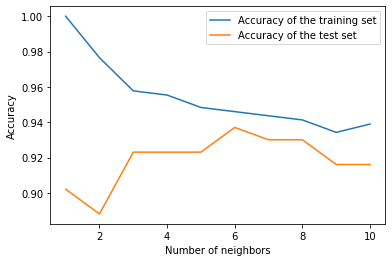

In [9]:
# Increase the randon_state to 66 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Initialize variables 
training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1,11)

# Build the list of training accuracy and testing accuracy data 
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

# Plot the training accuracy and testing accuracy data 
plt.plot(neighbors_settings, training_accuracy, 
            label="Accuracy of the training set")
plt.plot(neighbors_settings, testing_accuracy, 
            label="Accuracy of the test set")

# Display the x, y labels and legend 
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()


In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Accuracy of KNN n-5, on the training set: {:.3f}".format(knn.score(X_train, y_train)))
print()
print("Accuracy of KNN n-5, on the testing set: {:.3f}".format(knn.score(X_test, y_test)))



Accuracy of KNN n-5, on the training set: 0.946

Accuracy of KNN n-5, on the testing set: 0.930


In [11]:
## Regularization
### - Avoid of overfitting 
### - L1 - assumes only a few important features 
### - L2 - no assumption: L2 is used by default in scikit-learn Logistic Regression
## 'C'
### - parameter to control the strength of regularization 
### - lower C  => log_reg adjust to the majority of data points 
### - higher C => correct classification of each data point 

In [15]:
# Better Classification
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)

print("Accuracy of Logistic Regression on the training set: {:.3f}".format(log_reg100.score(X_train, y_train)))
print()
print("Accuracy of Logistic Regression on the testing set: {:.3f}".format(log_reg100.score(X_test, y_test)))

Accuracy of Logistic Regression on the training set: 0.958

Accuracy of Logistic Regression on the testing set: 0.965


In [16]:
# Poorer Classification 
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)

print("Accuracy of Logistic Regression on the training set: {:.3f}".format(log_reg001.score(X_train, y_train)))
print()
print("Accuracy of Logistic Regression on the testing set: {:.3f}".format(log_reg001.score(X_test, y_test)))

Accuracy of Logistic Regression on the training set: 0.934

Accuracy of Logistic Regression on the testing set: 0.930


## Linear models (in general):
### y = w * x + b 
### where: 
###     x - slope (coefficient) as .coef_
###     b - offset (or intercept) as .intercept_
###     both w & b are learned parameters 
###     y - prediction (decision)
### for example: dataset with one-input features 
###     y = w[0] * x[0] + b 


w[0]: 0.393906  b: -0.031804


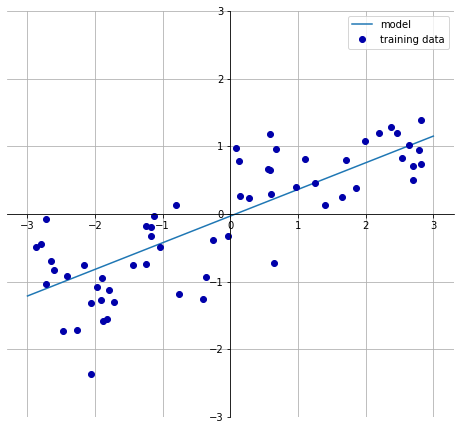

In [18]:
import mglearn 

mglearn.plots.plot_linear_regression_wave()

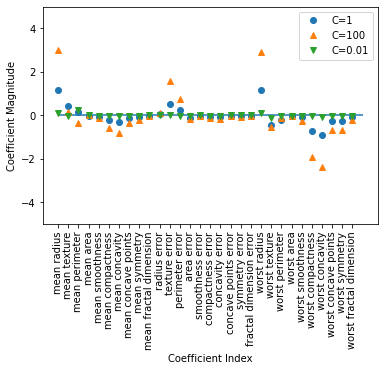

In [24]:
plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log_reg100.coef_.T, '^', label="C=100")
plt.plot(log_reg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()